This Jupyter notebook calculates the higher-order variance.

Note that each (possibly normalized) image can be written as a linear combination
\begin{equation*}
\rho_B = \sum_{x=0}^h \rho_x
\end{equation*}
where $\rho_x \in \mathbb{R}^n$ is the dimension $x$ "component" of the entire persistence image.

Let $\rho_x^i$ be the $i^{th}$ entry of $\rho_x$, and let $R$ be the set of all persistence images such that $R_x$ is the set of all $x$ "components". Then define 
\begin{equation*}
\mu R_x = \frac{1}{|R|} \sum_{\rho_x \in R_x} \rho_x
\end{equation*}
as the mean $\rho_x$ image component.
The higher-order variance (up to dimension $h$) can then be defined as
\begin{equation*}
V_h^p(\rho_B) = \frac{1}{h} \sum_{x=1}^h ||\alpha(\rho_x - \mu R_x)||_p^2
\end{equation*}
where $\alpha$ is a scale parameter used to keep the numerical values tame during calculations.

In [16]:
# imports, declare necessary PATH variables

path_to_gurobi = r'C:/gurobi1200/win64' # Set to gurobi path in environment variables
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [17]:
%run functions_for_analysis.ipynb

In [36]:
folder_path = 'Data/Nov_1_2024/'
alpha = 1/(1e5) # We choose a scalar of alpha=1e5 since the maximum difference r1-mu_R1 ~ O(1e5); we wish to have V ~ O(1) for presentation purposes

upper_list =  np.array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.00075, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 1])*97601
lower_list = np.array([1e-05, 2e-05, 3e-05, 4e-05, 5e-05, 6e-05, 7e-05, 8e-05, 9e-05])*97601

indices_map = {} # Map the indicial locations on the grid to the corresponding upper and lower bound thresholds

# Note that just as in example.ipynb, we exclude the first column (or smallest lower bound) from the analysis
for i in range(len(upper_list)):
    for j in range(1,len(lower_list)):
        indices_map[upper_list[i],lower_list[j]] = (i,j)

parameter_pairs = np.array(list(itertools.product(upper_list,lower_list[1:])))

higher_order_variances = np.zeros((len(upper_list),len(lower_list)-1))

# Find the sample average dimensional vectors over the (observed) network/feature space
mu_R1 = np.zeros((20*20))
mu_R2 = np.zeros((20*20))
for pair in parameter_pairs:
    (i,j) = indices_map[pair[0],pair[1]]
    r1, r2 = get_dim_components(folder_path + str((j,i)) + ".csv")
    mu_R1 = mu_R1 + r1
    mu_R2 = mu_R2 + r2
mu_R1 = mu_R1 / len(parameter_pairs)
mu_R2 = mu_R2 / len(parameter_pairs)

# Calculate the higher order variance of each observed network in the sample
for pair in parameter_pairs:
    (i,j) = indices_map[pair[0],pair[1]]
    r1, r2 = get_dim_components(folder_path + str((j,i)) + ".csv")
    higher_order_variances[i,j-1] = (np.linalg.norm(alpha*(r1-mu_R1))**2 + np.linalg.norm(alpha*(r2-mu_R2))**2) / 2

We can plot the (scaled) higher-order variances along with the optimal choices from example.ipynb

/tmp/ipykernel_1317/264313777.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.round(lower_list,1))


Text(0.5, 1.0, 'Higher-Order Variance $V_2^2(\\mathcal{N})$')

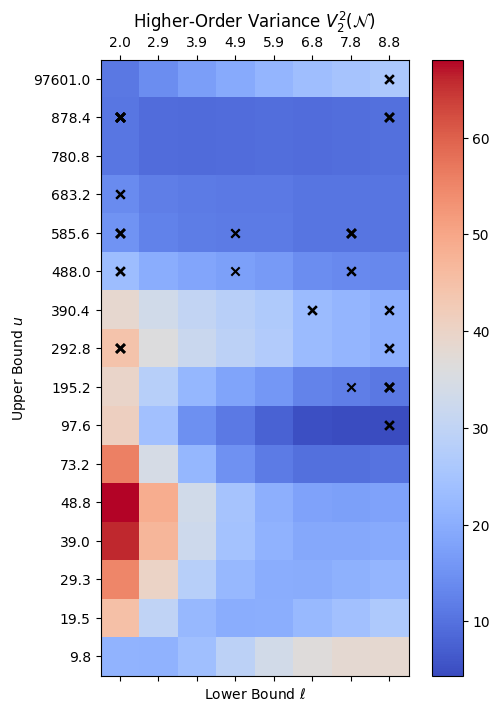

In [37]:
fig,ax = plt.subplots(figsize=(6,8))

upper_list =  np.array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.00075, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 1])*97601
lower_list = np.array([1e-05, 2e-05, 3e-05, 4e-05, 5e-05, 6e-05, 7e-05, 8e-05, 9e-05])*97601

c = ax.matshow(higher_order_variances[::-1,:], cmap='coolwarm')
ax.set_xticklabels(np.round(lower_list,1))
ax.set_yticks(np.arange(0,16))
ax.set_yticklabels(np.round(upper_list[::-1],1))
ax.set_xlabel(r'Lower Bound $\ell$')
ax.set_ylabel(r'Upper Bound $u$')

optimal_indices = [[15, 8], [15, 8], [15, 8], [15, 8], [14, 8], [14, 8], [11, 7], [10, 7], [9, 8], [9, 6], [14, 8], [14, 8], [14, 8], [14, 8], [14, 8], [14, 8], [11, 7], [10, 7], [9, 8], [9, 6], [11, 7], [11, 7], [11, 7], [11, 7], [11, 7], [11, 7], [11, 7], [10, 7], [9, 8], [9, 6], [7, 8], [7, 8], [7, 8], [7, 8], [7, 8], [8, 8], [8, 8], [8, 8], [8, 8], [9, 6], [7, 8], [7, 8], [7, 8], [7, 8], [7, 8], [7, 7], [11, 4], [11, 4], [10, 4], [10, 1], [6, 8], [6, 8], [6, 8], [6, 8], [6, 8], [14, 1], [14, 1], [14, 1], [12, 1], [10, 1], [14, 1], [14, 1], [14, 1], [14, 1], [14, 1], [14, 1], [14, 1], [14, 1], [12, 1], [10, 1], [14, 1], [14, 1], [14, 1], [14, 1], [14, 1], [14, 1], [14, 1], [14, 1], [12, 1], [10, 1], [11, 1], [11, 1], [11, 1], [11, 1], [11, 1], [11, 1], [11, 1], [11, 1], [11, 1], [10, 1], [8, 1], [8, 1], [8, 1], [8, 1], [8, 1], [8, 1], [8, 1], [8, 1], [8, 1], [8, 1]]
for index in optimal_indices:
    ax.scatter(index[1]-1,15-index[0],color='black', marker='x')

fig.colorbar(c)

ax.set_title(r'Higher-Order Variance $V_2^2(\mathcal{N})$')